<a href="https://colab.research.google.com/github/PG-2597/CAPSTONE-PROJECT/blob/main/CAPSTONE_PROJECT_Priya_Gupta_week17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CAPSTONE PROJECT on OLYMPICS DATABASE**

## **Introduction to Dataset:-**


Olympix dataset is the database of all the sports played in olympics in a range of years and details of the winners in those sports.


**There are 8618 0bservations and 10 variables which are described below:-**



**1. name:** This column displays the name of the players.

**2. age:** Age of the players in that particular year in which they played the olympics.

**3. country:** Country of the player.

**4. year** Year of olympics in which they played or won.

**5. Date_Given** Date at which they played or won.

 **6. sports**  Name of sport they played or won in.

**7. gold_medal:** Number of total gold medals won by the player.

**8. silver_medal:** Number of total silver medals won by the player.

**9. brone_medal:** Number of total bronze medals won by the player.

**10. total_medal:** Total Number of medals won by the player.


**Understanding of Dataset:**

In the above dataset all the columns are self explanatory and can be easily understandable.

###PART-2(Python and DS)   

### Let’s Start with importing the required libraries:-

**For Data manipulation and analysis, we will import numpy and pandas and for Data Visualization, we will import seaborn and matplotlib libraries.** 

In [ ]:
import numpy as np #NumPy is a general-purpose array-processing package and deals with numerical values and arrays.
import pandas as pd # pandas library deals with dataframes.
import seaborn as sns # for visualization of statistical graphs
from matplotlib import pyplot as plt # library built on NumPy arrays and use for data visualization

In [ ]:
df = pd.read_csv('/content/olympics_data.csv.csv') #Reading the csv file
df.head(10)

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
5,Alicia Coutts,24.0,Australia,2012,08-12-2012,Swimming,1,3,1,5
6,Missy Franklin,17.0,United States,2012,08-12-2012,Swimming,4,0,1,5
7,Ryan Lochte,27.0,United States,2012,08-12-2012,Swimming,2,2,1,5
8,Allison Schmitt,22.0,United States,2012,08-12-2012,Swimming,3,1,1,5
9,Natalie Coughlin,21.0,United States,2004,8/29/2004,Swimming,2,2,1,5


**Explanation:** Firstly, I read the excel file and load the data into a dataframe with name df. 

Then, I used head(10) method to display top 10 rows of our dataframe.

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


In [ ]:
print(df.nunique())

name            6955
age               42
country          110
year               7
Date_Given         7
sports            49
gold_medal         7
silver_medal       4
brone_medal        4
total_medal        7
dtype: int64


**Explanation:** I used df.info() method as it provides the schema of the database such as number of rows and columns alongwith their data types.

It also species the count of non-null values from which we can easily know how many null values are present in each column. 

Finding null values is one of the important step of data cleaning.

**From the above output, it is clear that there are 5 null values each in name and age columns**

**Also, here I used df.nunique() method to find unique values for each column which also signifies the need of this project.**

**The total number of events in the Olympics is 8618 in 49 sports. And for every event there are winners. Therefore,a lot of data is generated. So, by using Python and PySpark we will analyze this data.**

In [ ]:
# Another way of finding null values is:

print(df.isnull().sum())

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64


In [ ]:
#For finding the rows with missing values,we can use:

df.loc[df.isnull().any(axis=1)]

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,08-12-2012,Hockey,0,1,0,1


For specific selection of rows based on condition that it should have null values, I have used loc method. And axis=1, is used for rows selection.

**I am going to fill the null values in name column with "Unknown" and age column with median.**

I am going to do so because other than name and age we have data for the number of medals won by the player and on which date and for which sport they have won it. Other than that, we have the name of the country as well, so while analysing the data country or year wise, the stability of data shouldn't be affected.

**I will fill the null values in age by median because it doesn't get affected by outliers.**

In [ ]:
median_age= np.median(df['age'])
median_age

In [ ]:
df["name"].fillna("Unknown", inplace = True)
df["age"].fillna(26, inplace = True) # As,median age is 26.

**Here,inplace = True , will return nothing and the dataframe is now updated.**

In [ ]:
# Selecting duplicate rows except first occurrence based on all columns:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1429,Unknown,0.0,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
1430,Unknown,0.0,Brazil,2012,08-12-2012,Volleyball,0,1,0,1
4486,Unknown,0.0,Argentina,2012,08-12-2012,Hockey,0,1,0,1


From the above output, we can see that there are three rows with duplicate values. 

**I am going to drop all three duplicate rows using drop.duplicated() method**

In [ ]:
df2 = df.drop_duplicates() # will drop all duplicate rows except the first occurence
df2

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


In [ ]:
# Now, to find the presence of special characters in the name column, 
#I will select the rows in which Name column has special characters:

df2[df2.name.str.contains(r'[@#&$%+-/*]')]

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
17,Libby Lenton-Trickett,23.0,Australia,2008,8/24/2008,Swimming,2,1,1,4
23,Gary Hall Jr.,25.0,United States,2000,10-01-2000,Swimming,2,1,1,4
28,An Hyeon-Su,20.0,South Korea,2006,2/26/2006,Short-Track Speed Skating,3,0,1,4
32,Leontien Zijlaard-van Moorsel,30.0,Netherlands,2000,10-01-2000,Cycling,3,1,0,4
33,Petter Northug Jr.,24.0,Norway,2010,2/28/2010,Cross Country Skiing,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...
8600,Yun Mi-Jin,21.0,South Korea,2004,8/29/2004,Archery,1,0,0,1
8607,Jang Yong-Ho,24.0,South Korea,2000,10-01-2000,Archery,1,0,0,1
8609,Kim Cheong-Tae,20.0,South Korea,2000,10-01-2000,Archery,1,0,0,1
8611,O Gyo-Mun,28.0,South Korea,2000,10-01-2000,Archery,1,0,0,1


In [ ]:
# To remove the special characters:

df2.name=df2.name.str.replace('[@#&$%+-/*]',' ')
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


###**Perform data visualization techniques to appropriate columns and explain them.**  

There are 3 types of data visualizations are there :-

1. Univariate analysis

2. Bivariate analysis

3. Multivariate analysis


1. Univariate analysis

Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable. The major reason for univariate analysis is to use the data to describe the distribution. The analysis will take data, summarise it, and then find some pattern in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



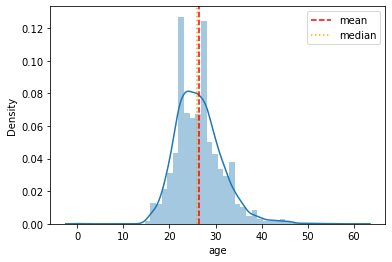

In [ ]:
# Distribution of Age

sns.distplot(df2['age'])
plt.axvline(x=np.mean(df2['age']),color='red',ls='--',label='mean') #axvline() function in axes module of matplotlib library is used to add a vertical line across the axis. 
plt.axvline(x=np.median(df2['age']),color='orange',ls=':',label='median')
plt.legend()



In [ ]:
mean=np.mean(df2['age'])
mean

26.39930354033662

In [ ]:
median=np.median(df2['age'])
median

26.0

**Explanation:** From the above output it is clear that the distribution of age is positively skewed. The mean and median are almost equal thus, we can say that the data is almost symmetric.

Also, the average age of sportspersons played or won is 26.

**2. Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent. These variables are usually denoted by X and Y. So, here we analyse the changes occured between the two variables and to what extent.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

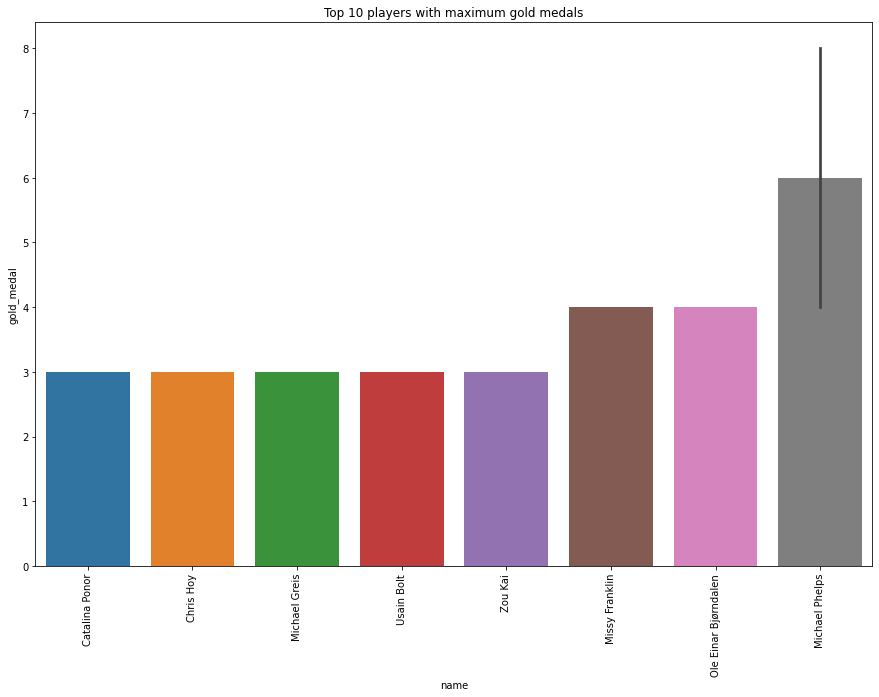

In [ ]:
# 2. To analyse which are top 10 players based on number of gold medals won:-

df2.sort_values(by=['gold_medal'], inplace=True)
gold1 = df2.tail(10)
fig = plt.figure(figsize=(15,10))
plt.title("Top 10 players with maximum gold medals")
sns.barplot(x='name', y='gold_medal', data=gold1) 
plt.xticks(rotation=90)


Here, the black line over Michael shows that there is some error. To overcome that, we can use ci=None in the plot after data=df, ci=None.

**Explanation:** The above graph clearly depicts that Michael Phelps has the maximum number of gold medals.

Similarly, we can analyse who won maximum silver and bronze medals also.

**3. Multivariate (M): Comparing more than 2 variables is called as Multivariate analysis.**


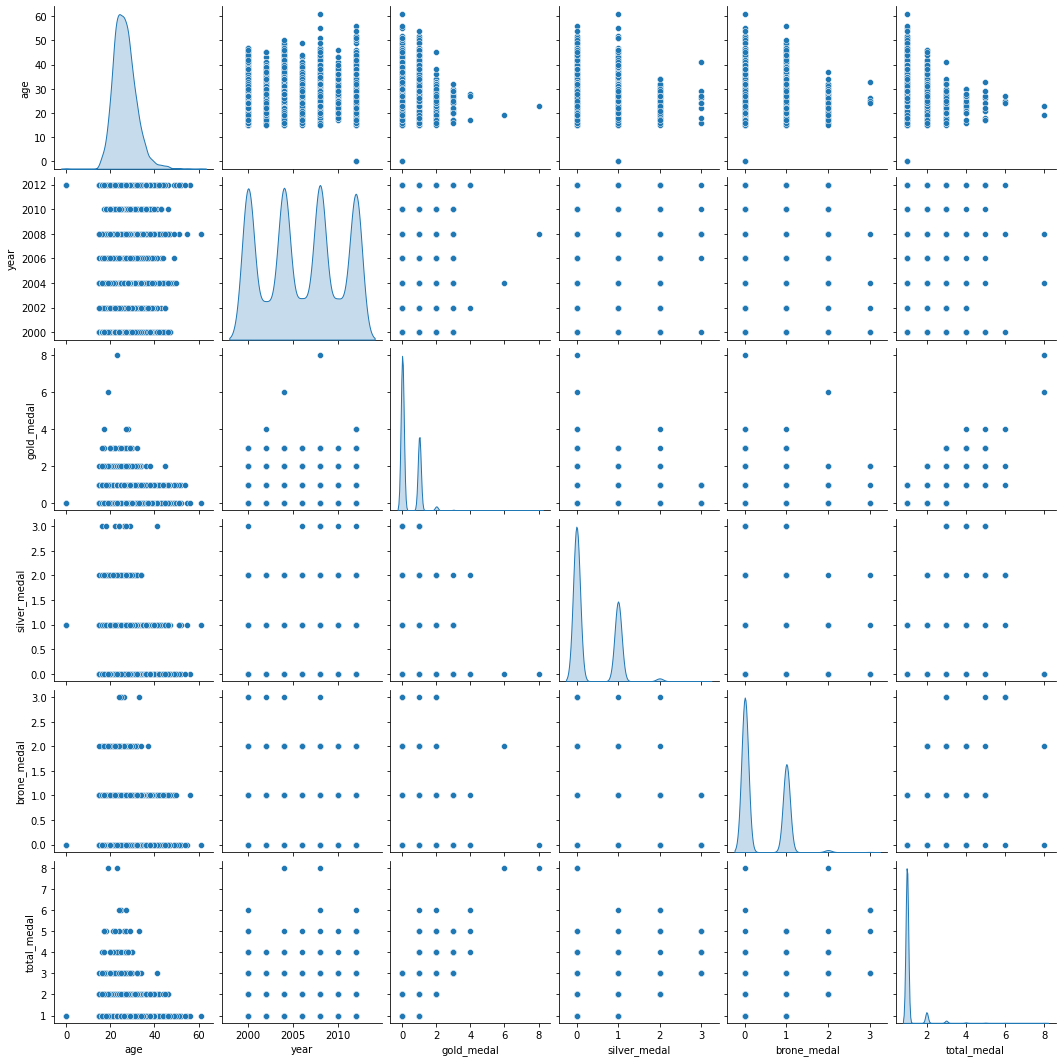

In [ ]:
sns.pairplot(df2,diag_kind='kde')

**Explanation:** In the above code, I have used pair plot to demonstrate the relationship of all attributes with each other.Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

As we have n number of features in this dataset, Pair plot will help us create a (n x n) figure where the diagonal plots will be histogram plot of the feature corresponding to that row and rest of the plots are the combination of feature from each row in y axis and feature from each column in x axis.

###**Checking if the age dataset is skewed or symmetric**

In [ ]:
# To check the skewness 
df2.age.skew()

0.8228435580507555

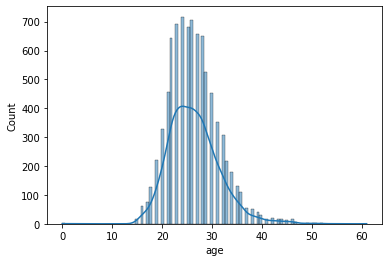

In [ ]:
# Anyalysing the skewness with the help of histogram 
sns.histplot(x='age', data=df2, kde=True)

As discussed earlier also, the age data is moderately skewed and from the above graph, it is clearly visible that the data is positively skewed.

**The skewness in age is=0.8228435580507555, it is not much but it can still interfere with our data analysis. Thus, to make the data symetric, we will use log transformation**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



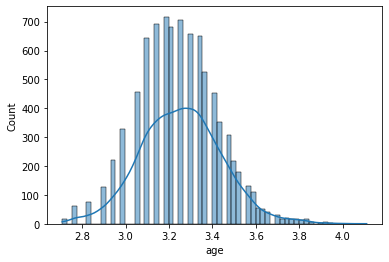

In [ ]:
olympic_log = df2.copy(deep=True)
olympic_log['age'] = np.log(olympic_log['age'])
sns.histplot(x='age', data=olympic_log, kde=True)

The above histogram represents normal distribution.

###**Perform appropriate numerical measures on each column and report them accordingly.**

In [ ]:
# To represent the columns statistically, we will use:

df2.describe()

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000
mean,26.399304,2005.976785,0.364829,0.363088,0.377829,1.105746
std,5.117364,4.289221,0.545401,0.511564,0.505044,0.408958
min,0.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


**Explanation:** Above output displays the total counts, average value, standard daviation, minimum value, IQ1, IQ2, IQ3 and the maximum values of each and every column.

In [ ]:
# In the above output, we can see that the describe function only displays values for quantitative features

# So, to define categorical features statistically, we will use:-

df2.describe(include=object)

,name,country,Date_Given,sports
count,8615,8615,8615,8615
unique,6956,110,7,49
top,Heather Petri,United States,8/24/2008,Athletics
freq,4,1109,1872,687


**From the above code, we can analyse the total counts, number of unique values, top values(mode) and the frequency of the mode for each and every categorical columns.**

###**The top 10 countries with the gold medal, with the silver medal, then the bronze medal and the total medal.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

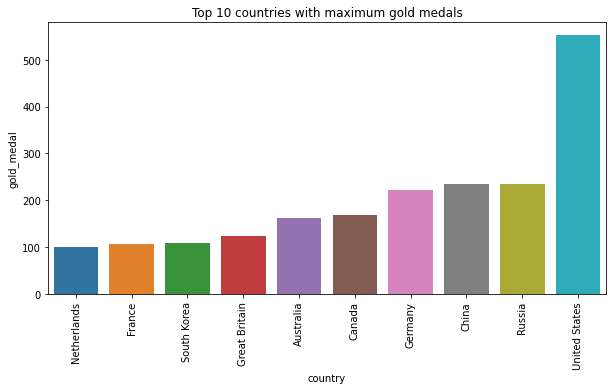

In [ ]:
#1. Top 10 countries with the gold medal

medal = df2.groupby('country').sum()
medal.sort_values(by=['gold_medal'], inplace=True)
gold = medal.tail(10)
fig = plt.figure(figsize=(10,5))
plt.title("Top 10 countries with maximum gold medals")
sns.barplot(x = gold.index, y = gold.gold_medal)
plt.xticks(rotation=90)

**Explanation:** The above graph clearly shows that the order of countries with maximum number of gold medals is as follows:-

**United States> Russia>China>Germany>.....>Netherlands**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

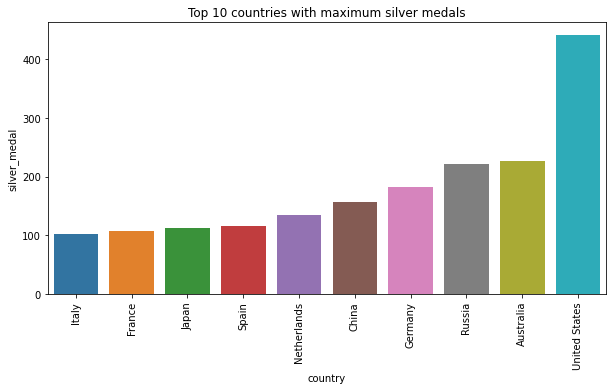

In [ ]:
#1. Top 10 countries with the silver medal

medal.sort_values(by=['silver_medal'], inplace=True)
silver = medal.tail(10)
fig = plt.figure(figsize=(10,5))
plt.title("Top 10 countries with maximum silver medals")
sns.barplot(x = silver.index, y = silver.silver_medal)
plt.xticks(rotation=90)

**Explanation:** The above graph clearly shows that the order of countries with maximum number of silver medals is as follows:-

**United States>Australia> Russia> Germany>.....>Italy**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

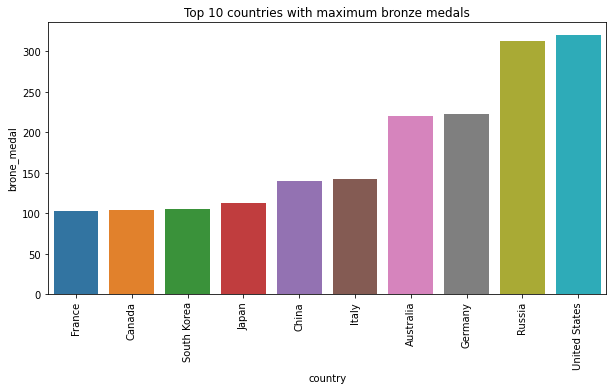

In [ ]:
# 3. Top 10 countries with bronze medals

medal.sort_values(by=['brone_medal'], inplace=True)
brone = medal.tail(10)
fig = plt.figure(figsize=(10,5))
plt.title("Top 10 countries with maximum bronze medals")
sns.barplot(x = brone.index, y = brone.brone_medal)
plt.xticks(rotation=90)

**Explanation:** The above graph clearly shows that the order of countries with maximum number of bronze medals is as follows:-

**United States> Russia> Germany>.....>France**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

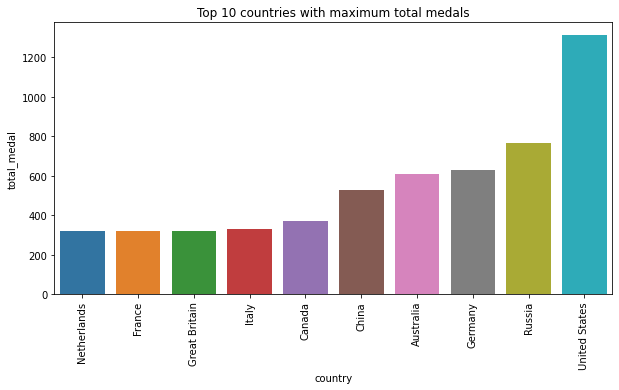

In [ ]:
# 4. Top 10 countries with the total medals.

medal.sort_values(by=['total_medal'], inplace=True)
total = medal.tail(10)
fig = plt.figure(figsize=(10,5))
plt.title("Top 10 countries with maximum total medals")
sns.barplot(x = total.index, y = total.total_medal)
plt.xticks(rotation=90)

**Explanation:** The above graph clearly shows that the order of countries with maximum number of total medals is as follows:-

**United States> Russia> Germany>.....>Netherlands**



---

---





##**PART-3(PySpark)**

##Installing and Initializing Pyspark

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 64.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=2a3e2d2c2018093096b04d7c7414fdbfeb0a013c71b80b0b8a4a58a4c709f476
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



###Converting pandas dataframe to Pyspark dataframe

In [ ]:
sparkDF=spark.createDataFrame(df2) 
sparkDF.printSchema()
sparkDF.show()


root
 |-- name: string (nullable = true)
 |-- age: double (nullable = true)
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: long (nullable = true)
 |-- silver_medal: long (nullable = true)
 |-- brone_medal: long (nullable = true)
 |-- total_medal: long (nullable = true)

+------------------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|              name| age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+------------------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
| Antero Niittymäki|25.0|Finland|2006| 2/26/2006|Ice Hockey|         0|           1|          0|          1|
|       Paolo Cozzi|24.0|  Italy|2004| 8/29/2004|Volleyball|         0|           1|          0|          1|
|   Ruslan Olikhver|31.0| Russia|2000|10-01-2000|Volleyball| 

**Explanation:** Firstly, I have created a spark dataframe and load the converted pandas dataframe into it.

Then, I have print the schema of the dataset which provides info about the data columns and their types. Then, I used show() method to display my spark dataframe.

In [ ]:
# Write PySpark code to read the olympix_data.csv file

df3 = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")
df3.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

**Explanation:** I have used read.format() method to read the csv file and load it into a dataframe with name df3.

Then, used show() method to display the df3 dataframe.

In [ ]:
# Write PySpark code to print the Olympic Sports/games in the dataset.

sparkDF.select(sparkDF.columns[5]).show()

+----------+
|    sports|
+----------+
|Ice Hockey|
|Volleyball|
|Volleyball|
| Athletics|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
|Volleyball|
+----------+
only showing top 20 rows



**Explanation:** Here, I used select function to select and display the sports column from our spark dataframe.

<Figure size 2160x1080 with 0 Axes>

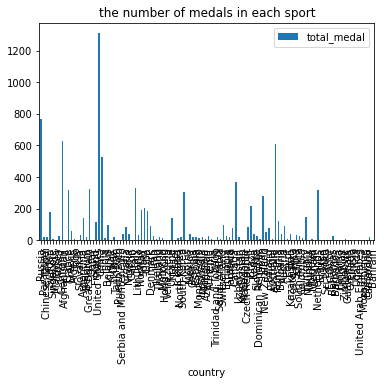

In [ ]:
# Write PySpark code to plot the total number of medals in  each Olympic Sport/game

fig = plt.figure(figsize=(30,15))
res = sparkDF.groupBy("country").agg({"total_medal":"sum"})
res = res.withColumnRenamed("sum(total_medal)","total_medal")
get_Pandas_DF = res.toPandas() # we can use toPandas() for converting pyspark dataframe to Pandas dataframe
get_Pandas_DF.plot.bar(x="country",y="total_medal",title="the number of medals in each sport")
plt.show(block=True)

**Explanation:** Firstly, we will use groupby and sum aggregate function to group the data based on each sports. Then, to use matplotlib we have to convert our spark df into pandas df.

After converting the spark df into pandas df, we will plot bar graph normally as we do in python using matplotlib.

In [ ]:
# Sort the result based on the total number of medals.

import pyspark.sql.functions as f

res = sparkDF.groupBy("country").agg({"total_medal":"sum"})
res = res.withColumnRenamed("sum(total_medal)","total_medal")
sort_res=res.orderBy(f.desc("total_medal"))
sort_res.show()

+-------------+-----------+
|      country|total_medal|
+-------------+-----------+
|United States|       1312|
|       Russia|        768|
|      Germany|        629|
|    Australia|        609|
|        China|        530|
|       Canada|        370|
|        Italy|        331|
|Great Britain|        322|
|       France|        318|
|  Netherlands|        318|
|  South Korea|        308|
|        Japan|        282|
|       Brazil|        219|
|        Spain|        205|
|       Norway|        192|
|         Cuba|        188|
|       Sweden|        181|
|      Hungary|        145|
|      Ukraine|        143|
|    Argentina|        140|
+-------------+-----------+
only showing top 20 rows



**Explanation:** The above code clearly shows that United States has maximum number of total medals with 1312 medals followed by Russia with 768 medals and so on.

**We can also limit our result to top 10 or top 5 countries using limit() method as shown below:-**

In [ ]:
sort_res=res.orderBy(f.desc("total_medal")).limit(5) # Now, we will get top 5 countries.
sort_res.show()

+-------------+-----------+
|      country|total_medal|
+-------------+-----------+
|United States|       1312|
|       Russia|        768|
|      Germany|        629|
|    Australia|        609|
|        China|        530|
+-------------+-----------+



In [ ]:
# Find the total number of medals won by each country in swimming.

res1 = sparkDF.groupBy("country","sports").agg({"total_medal":"sum"})
res1 = res1.withColumnRenamed("sum(total_medal)","total_medal")
get_swimming_data=res1.filter(res1['sports']=='Swimming')
get_swimming_data.show()

+-------------------+--------+-----------+
|            country|  sports|total_medal|
+-------------------+--------+-----------+
|            Croatia|Swimming|          1|
|          Australia|Swimming|        163|
|              Japan|Swimming|         43|
|            Denmark|Swimming|          1|
|           Slovenia|Swimming|          1|
|        South Korea|Swimming|          4|
|Trinidad and Tobago|Swimming|          1|
|            Romania|Swimming|          6|
|           Slovakia|Swimming|          2|
|             France|Swimming|         39|
|             Sweden|Swimming|          9|
|            Hungary|Swimming|          9|
|              Italy|Swimming|         16|
|             Norway|Swimming|          2|
|          Argentina|Swimming|          1|
|         Costa Rica|Swimming|          2|
|             Brazil|Swimming|          8|
|      Great Britain|Swimming|         11|
|       South Africa|Swimming|         11|
|              Spain|Swimming|          3|
+----------

**Explanation:** Here apart from grouping our data we had filter it using filter() method based on the sport we wanted to dispaly.

In [ ]:
# Find the total number of medals won by each country in Skeleton.

res2 = sparkDF.groupBy("country","sports").agg({"total_medal":"sum"})
res2 = res2.withColumnRenamed("sum(total_medal)","total_medal")
get_skeleton_data=res2.filter(res2['sports']=='Skeleton')
get_skeleton_data.show()

+-------------+--------+-----------+
|      country|  sports|total_medal|
+-------------+--------+-----------+
|       Canada|Skeleton|          4|
|       Russia|Skeleton|          1|
|United States|Skeleton|          3|
|      Germany|Skeleton|          2|
|       Latvia|Skeleton|          1|
|      Austria|Skeleton|          1|
|Great Britain|Skeleton|          3|
|  Switzerland|Skeleton|          3|
+-------------+--------+-----------+



In [ ]:
# Find the number of medals that the US won yearly.

res3 = sparkDF.groupBy("year","country").agg({"total_medal":"sum"})
res3 = res3.withColumnRenamed("sum(total_medal)","total_medal")
get_us_data=res3.filter(res3['country']=='United States')
get_us_data.show()

+----+-------------+-----------+
|year|      country|total_medal|
+----+-------------+-----------+
|2004|United States|        265|
|2010|United States|         97|
|2002|United States|         84|
|2006|United States|         52|
|2008|United States|        317|
|2000|United States|        243|
|2012|United States|        254|
+----+-------------+-----------+



**Explanation:** Here also, I have used the same logic as above, just changed the column names according to the requirement of the question.

In [ ]:
#Find the total number of medals won by each country.

res4 = sparkDF.groupBy("country").agg({"total_medal":"sum"})
res4 = res4.withColumnRenamed("sum(total_medal)","total_medal")
res4.show()

+--------------+-----------+
|       country|total_medal|
+--------------+-----------+
|        Russia|        768|
|      Paraguay|         17|
|Chinese Taipei|         20|
|        Sweden|        181|
|     Singapore|          7|
|      Malaysia|          3|
|        Turkey|         28|
|       Germany|        629|
|   Afghanistan|          2|
|        France|        318|
|        Greece|         59|
|       Algeria|          8|
|          Togo|          1|
|      Slovakia|         35|
|     Argentina|        140|
|       Belgium|         18|
| Great Britain|        322|
|         Qatar|          3|
|       Finland|        118|
| United States|       1312|
+--------------+-----------+
only showing top 20 rows



In [ ]:
# Who was the oldest athlete in the olympics? 

res5 = sparkDF.select("age").agg({"age":"max"})
res5.show()

+--------+
|max(age)|
+--------+
|    61.0|
+--------+



In [ ]:

sparkDF.createOrReplaceTempView("table1")
res5 = spark.sql("select name as Oldest_Athlete,age from table1 where age>60")
res5.show()

+--------------+----+
|Oldest_Athlete| age|
+--------------+----+
|    Ian Millar|61.0|
+--------------+----+



**Explanation:** For the above question, I have divided the code into 2 parts.

First part of code, I found that maximum age present in our database is 61 and using that in 2nd part of code with the help of spark.sql() function, I displayed the name and age of the athlete.

In [ ]:
# Which country was he/she from?

sparkDF.createOrReplaceTempView("table1")
res6 = spark.sql("select country,name,age from table1 where age>60")
res6.show()

+-------+----------+----+
|country|      name| age|
+-------+----------+----+
| Canada|Ian Millar|61.0|
+-------+----------+----+



**Explanation:** Again, I have used sql query to find the country of oldest athlete which is canada.



---



---


